## Put our data on map!
Good news about my data is that it comes with shp file. Let's see what it gives to us!
Key point: 
- Looks like a lot of accidents are on principal arterial

In [1]:
import pdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pygeos

In [5]:
clo_shp = gpd.read_file("/Users/ou/Projects/Others/data-incubator/Collision/Collisions.shp")
str_shp = gpd.read_file("/Users/ou/Projects/Others/data-incubator/Streets/Seattle_Streets.shp")

In [7]:
sign_shp = gpd.read_file("/Users/ou/Projects/Others/data-incubator/Street_Signs-shp/Street_Signs.shp")

In [17]:
# Road Weather Information Stations
weather_shp = gpd.read_file("/Users/ou/Projects/data-incubator/Road Weather Information Stations/weather.shp")

In [39]:
# weather_shp.date_datet = pd.to_datetime(weather_shp.date_datet)
weather_shp.date_datet.dt.year.value_counts()

2020    896884
2019     28116
Name: date_datet, dtype: int64

In [ ]:
clo_shp

In [13]:
sign_shp.head(2)

OBJECTID  COMPKEY  COMPTYPE  SEGKEY  INTKEY  ELMNTKEY      UNITID UNITTYPE  \
0         1   764273        20  269146       1    121279  SGN-230382    01-RS   
1         2   562124        20    1471   32306      1497  SGN-156972   03-GSC   

  SIGNTYPE CATEGORY  ...     ADDDTTM     MODDTTM    INSTDATE  EXPDATE  \
0    R2-25    REGSL  ...  2020-04-15  2020-04-15  2020-03-13     None   
1  D3-103X      SNS  ...  2011-05-12        None  2009-01-07     None   

  PRIMARYDIS SECONDARYD   SHAPE_LNG  SHAPE_LAT  MODBY  \
0  DISTRICT2       None -122.287629  47.526204  CHOIE   
1  DISTRICT2       None -122.318675  47.563461   None   

                      geometry  
0  POINT (-122.28763 47.52620)  
1  POINT (-122.31867 47.56346)  

[2 rows x 40 columns]

In [3]:
# STREETTYPE, ARTDESCRIP give me clues about the types of the streets
str_shp.head(2)

OBJECTID  ARTCLASS  COMPKEY UNITID UNITID2 UNITIDSORT  \
0         1       2.0     1006  00010    0120  000100120   
1         2       2.0     1009  00010    0150  000100150   

                                      UNITDESC STNAME_ORD     XSTRLO  \
0  1ST AVE BETWEEN SENECA ST AND UNIVERSITY ST    1ST AVE  SENECA ST   
1          1ST AVE BETWEEN PIKE ST AND PINE ST    1ST AVE    PIKE ST   

          XSTRHI  ...             STREETTYPE PVMTCONDIN PVMTCOND_1  TRANCLASS  \
0  UNIVERSITY ST  ...  Downtown Neighborhood       87.0       62.0          1   
1        PINE ST  ...  Downtown Neighborhood       57.0       58.0          1   

                TRANDESCRI SLOPE_PCT PVMTCATEGO PARKBOULEV  SHAPE_Leng  \
0  PRINCIPAL TRANSIT ROUTE       4.0        ART          N  305.966050   
1  PRINCIPAL TRANSIT ROUTE       5.0        ART          N  426.031562   

                                            geometry  
0  LINESTRING (-122.33754 47.60612, -122.33820 47...  
1  LINESTRING (-122.34001 47.60882, -122.34092 47...  

[2 rows x 39 columns]

In [8]:
clo_shp['FATALITIES'].value_counts()

0    221386
1       334
2        14
3         2
5         1
4         1
Name: FATALITIES, dtype: int64

In [11]:
clo_shp.loc[clo_shp['ADDRTYPE'].isna(), 'ADDRTYPE'] = "unknown"

In [13]:
clo_shp[clo_shp['ADDRTYPE']=="unknown"][]

OBJECTID  INCKEY  COLDETKEY REPORTNO     STATUS ADDRTYPE  INTKEY  \
7              8    5721       5721  1786583  Unmatched  unknown     NaN   
17            18  327878     329378  EA03057    Matched  unknown     NaN   
472          473    1178       1178  3380692    Matched  unknown     NaN   
803          804   25100      25100  1328062    Matched  unknown     NaN   
914          915    1158       1158  3615264  Unmatched  unknown     NaN   
1014        1015    1250       1250  3645685  Unmatched  unknown     NaN   
1052        1053   89500      89500  3273964    Matched  unknown     NaN   
1169        1170   93500      93500  3275128    Matched  unknown     NaN   
1242        1243  201000     201140  3707575  Unmatched  unknown     NaN   
1261        1262  156500     156520  3374835    Matched  unknown     NaN   
1290        1291  208000     208200  3775839    Matched  unknown     NaN   
1343        1344  207500     207700  3738103    Matched  unknown     NaN   
1388        1389  107100     107100  3377384    Matched  unknown     NaN   
1389        1390  189400     189480  C791023  Unmatched  unknown     NaN   
1454        1455  169300     169320  3700152  Unmatched  unknown     NaN   
1493        1494  109900     109900  3375127    Matched  unknown     NaN   
1509        1510  192900     192980  E421768  Unmatched  unknown     NaN   
1543        1544  102200     102200  3274751    Matched  unknown     NaN   
1611        1612  235100     235500  E570237  Unmatched  unknown     NaN   
1655        1656  192800     192880  3733137    Matched  unknown     NaN   
1715        1716   84700      84700  C710127    Matched  unknown     NaN   
1719        1720  208700     208920  C803848  Unmatched  unknown     NaN   
1775        1776  235200     235631  E575834  Unmatched  unknown     NaN   
1785        1786  189500     189580  C791550  Unmatched  unknown     NaN   
1789        1790  145400     145400  C776071  Unmatched  unknown     NaN   
1837        1838  134700     134700  3507529  Unmatched  unknown     NaN   
1845        1846  100500     100500  3285867    Matched  unknown     NaN   
1884        1885  149100     149120  E208276    Matched  unknown     NaN   
1889        1890  125700     125700  3566314    Matched  unknown     NaN   
2023        2024  143100     143100  3611421  Unmatched  unknown     NaN   
...          ...     ...        ...      ...        ...      ...     ...   
218525    218526  329948     331448  C823389  Unmatched  unknown     NaN   
218560    218561  329712     331212  3836236  Unmatched  unknown     NaN   
218604    218605  329319     330819  EA18118  Unmatched  unknown     NaN   
218632    218633  328892     330392  EA05948    Matched  unknown     NaN   
218732    218733  329929     331429  C823293  Unmatched  unknown     NaN   
218820    218821  329920     331420  C822918  Unmatched  unknown     NaN   
218822    218823  330007     331507  C825098  Unmatched  unknown     NaN   
218823    218824  330677     332177  3777690  Unmatched  unknown     NaN   
218978    218979  329314     330814  EA18081  Unmatched  unknown     NaN   
219056    219057  329713     331213  3836237  Unmatched  unknown     NaN   
219120    219121  329345     330845  C822741  Unmatched  unknown     NaN   
219268    219269  330621     332121  EA03578    Matched  unknown     NaN   
219328    219329  329931     331431  C823377  Unmatched  unknown     NaN   
219380    219381  330754     332254  3851925    Matched  unknown     NaN   
219391    219392  329969     331469  C823651  Unmatched  unknown     NaN   
219833    219834  320446     321946  E932208  Unmatched  unknown     NaN   
220001    220002  321861     323361  E945647    Matched  unknown     NaN   
220041    220042  320812     322312  E935276    Matched  unknown     NaN   
220224    220225  320292     321792  E930249    Matched  unknown     NaN   
220291    220292  321196     322696  E940044    Matched  unknown     NaN   
220444    220445  319641     321141  E924756  Unmatched 

In [48]:
# I am curious to see Principal Arterial vs. Minor Arterial 
str_shp['ARTDESCRIP'].value_counts()

Not Designated         16961
Minor Arterial          2460
Principal Arterial      2197
Collector Arterial      1882
Interstate/Freeway       263
State Route/Freeway       36
County Arterial            1
Name: ARTDESCRIP, dtype: int64

In [50]:
# Curious to compare downtown to others
str_shp['STREETTYPE'].value_counts()

Neighborhood Yield Street            12799
Urban Village Neighborhood Access     3074
Neighborhood Corridor                 2193
Urban Center Connector                1186
Urban Village Neighborhood            1144
Urban Village Main                     811
Minor Industrial Access                594
Industrial Access                      460
Downtown                               298
Downtown Neighborhood                  227
Downtown Neighborhood Access           197
Alley                                   30
Name: STREETTYPE, dtype: int64

In [12]:
fig, ax = plt.subplots(figsize = (50,50))
clo_shp[clo_shp['ADDRTYPE']=="unknown"].plot(ax = ax, markersize = 30, color="red", marker="o")
str_shp.plot(ax=ax, color="black", label="Principal Arterial")
plt.legend(prop={'size':35})
plt.show()

/Users/ou/.virtualenvs/mlenv/lib/python3.7/site-packages/geopandas/array.py:689: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
/Users/ou/.virtualenvs/mlenv/lib/python3.7/site-packages/geopandas/array.py:690: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
/Users/ou/.virtualenvs/mlenv/lib/python3.7/site-packages/geopandas/array.py:691: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
/Users/ou/.virtualenvs/mlenv/lib/python3.7/site-packages/geopandas/array.py:692: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 3]),  # maxy


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

In [6]:
fata = clo_shp[(clo_shp['SEVERITYCO']=='3') & (clo_shp['FATALITIES']==2)]
pri_art = str_shp[str_shp['ARTDESCRIP']=='Principal Arterial']

In [7]:
test = gpd.sjoin(fata, pri_art, how="inner", op='intersects')

In [10]:
test.head()

OBJECTID_left  INCKEY  COLDETKEY REPORTNO STATUS_left      ADDRTYPE  \
46699           46700   60535      60535  2622510     Matched  Intersection   
46699           46700   60535      60535  2622510     Matched  Intersection   
108666         108667  122770     122770  3545401     Matched  Intersection   
108666         108667  122770     122770  3545401     Matched  Intersection   
199911         199912  333897     335397  3876377   Unmatched  Intersection   

         INTKEY                             LOCATION EXCEPTRSNC EXCEPTRSND  \
46699   28695.0      ELLIOTT AVE W AND W PROSPECT ST       None       None   
46699   28695.0      ELLIOTT AVE W AND W PROSPECT ST       None       None   
108666  36665.0     LAKE CITY WAY NE AND NE 110TH ST       None       None   
108666  36665.0     LAKE CITY WAY NE AND NE 110TH ST       None       None   
199911  34529.0  M L KING JR ER WAY S AND S HOLLY ST       None       None   

        ... NATIONHWYS              STREETTYPE PVMTCONDIN  PVMTCOND_1  \
46699   ...          Y       Industrial Access       74.0         0.0   
46699   ...          Y       Industrial Access       74.0         0.0   
108666  ...          N  Urban Center Connector        0.0         0.0   
108666  ...          N  Urban Center Connector        0.0         0.0   
199911  ...          Y      Urban Village Main       90.0        91.0   

        TRANCLASS           TRANDESCRI  SLOPE_PCT  PVMTCATEGO  PARKBOULEV  \
46699           2  MAJOR TRANSIT ROUTE        0.0         ART           N   
46699           2  MAJOR TRANSIT ROUTE        0.0         ART           N   
108666          2  MAJOR TRANSIT ROUTE        0.0         ART           N   
108666          2  MAJOR TRANSIT ROUTE        0.0         ART           N   
199911          2  MAJOR TRANSIT ROUTE        0.0         ART           N   

        SHAPE_Leng  
46699   980.254973  
46699   818.588554  
108666  633.439540  
108666  760.367310  
199911  678.336761  

[5 rows x 78 columns]

In [29]:
weather_unique = weather_shp[['date_datet', 'stationnam', 'geometry']].drop_duplicates()

In [30]:
weather_unique.head()

date_datet                 stationnam                     geometry
0   2019-09-18         SpokaneSwingBridge  POINT (-122.35174 47.57139)
1   2019-09-18              NE45StViaduct  POINT (-122.30193 47.66127)
2   2019-09-17       AlbroPlaceAirportWay  POINT (-122.31411 47.54743)
6   2019-09-17  HarborAveUpperNorthBridge  POINT (-122.37087 47.57169)
21  2019-09-17      RooseveltWay_NE80thSt  POINT (-122.31765 47.69210)

In [34]:
# 'date_datet', 'time_datet', 'recordid', 'stationnam', 'geometry', 'roadsurfac', 'airtempera'
    
weather_shp[['date_datet', 'time_datet', 'geometry', 'stationnam', 'roadsurfac', 'airtempera']].drop_duplicates()

date_datet    time_datet                     geometry  \
0       2019-09-18  02:02:00.000  POINT (-122.35174 47.57139)   
1       2019-09-18  15:12:00.000  POINT (-122.30193 47.66127)   
2       2019-09-17  02:17:00.000  POINT (-122.31411 47.54743)   
3       2019-09-17  02:18:00.000  POINT (-122.31411 47.54743)   
4       2019-09-17  02:19:00.000  POINT (-122.31411 47.54743)   
5       2019-09-17  02:20:00.000  POINT (-122.31411 47.54743)   
6       2019-09-17  02:16:00.000  POINT (-122.37087 47.57169)   
7       2019-09-17  02:17:00.000  POINT (-122.37087 47.57169)   
8       2019-09-17  02:18:00.000  POINT (-122.37087 47.57169)   
9       2019-09-17  02:19:00.000  POINT (-122.37087 47.57169)   
10      2019-09-17  02:20:00.000  POINT (-122.37087 47.57169)   
11      2019-09-17  02:21:00.000  POINT (-122.37087 47.57169)   
12      2019-09-17  02:22:00.000  POINT (-122.37087 47.57169)   
13      2019-09-17  02:23:00.000  POINT (-122.37087 47.57169)   
14      2019-09-17  02:24:00.000  POINT (-122.37087 47.57169)   
15      2019-09-17  02:25:00.000  POINT (-122.37087 47.57169)   
16      2019-09-17  02:26:00.000  POINT (-122.37087 47.57169)   
17      2019-09-17  02:27:00.000  POINT (-122.37087 47.57169)   
18      2019-09-17  02:28:00.000  POINT (-122.37087 47.57169)   
19      2019-09-17  02:29:00.000  POINT (-122.37087 47.57169)   
20      2019-09-17  02:30:00.000  POINT (-122.37087 47.57169)   
21      2019-09-17  02:16:00.000  POINT (-122.31765 47.69210)   
22      2019-09-17  02:17:00.000  POINT (-122.31765 47.69210)   
23      2019-09-17  02:18:00.000  POINT (-122.31765 47.69210)   
24      2019-09-17  02:19:00.000  POINT (-122.31765 47.69210)   
25      2019-09-17  02:20:00.000  POINT (-122.31765 47.69210)   
26      2019-09-17  02:21:00.000  POINT (-122.31765 47.69210)   
27      2019-09-17  02:22:00.000  POINT (-122.31765 47.69210)   
28      2019-09-17  02:23:00.000  POINT (-122.31765 47.69210)   
29      2019-09-17  02:24:00.000  POINT (-122.31765 47.69210)   
...            ...           ...                          ...   
924965  2020-08-01  21:18:00.000  POINT (-122.31411 47.54743)   
924966  2020-08-01  21:19:00.000  POINT (-122.31411 47.54743)   
924967  2020-08-01  21:20:00.000  POINT (-122.31411 47.54743)   
924973  2020-08-01  21:21:00.000  POINT (-122.31411 47.54743)   
924974  2020-08-01  21:22:00.000  POINT (-122.31411 47.54743)   
924975  2020-08-01  21:23:00.000  POINT (-122.31411 47.54743)   
924976  2020-08-01  21:24:00.000  POINT (-122.31411 47.54743)   
924977  2020-08-01  21:25:00.000  POINT (-122.31411 47.54743)   
924978  2020-08-01  21:26:00.000  POINT (-122.31411 47.54743)   
924979  2020-08-01  21:27:00.000  POINT (-122.31411 47.54743)   
924980  2020-08-01  21:28:00.000  POINT (-122.31411 47.54743)   
924981  2020-08-01  21:29:00.000  POINT (-122.31411 47.54743)   
924982  2020-08-01  21:30:00.000  POINT (-122.31411 47.54743)   
924983  2020-08-01  21:16:00.000  POINT (-122.34728 47.64317)   
924984  2020-08-01  21:17:00.000  POINT (-122.34728 47.64317)   
924985  2020-08-01  21:18:00.000  POINT (-122.34728 47.64317)   
924986  2020-08-01  21:19:00.000  POINT (-122.34728 47.64317)   
924987  2020-08-01  21:20:00.000  POINT (-122.34728 47.64317)   
924988  2020-08-01  21:21:00.000  POINT (-122.34728 47.64317)   
924989  2020-08-01  21:22:00.000  POINT (-122.34728 47.64317)   
924990  2020-08-01  21:23:00.000  POINT (-122.34728 47.64317)   
924991  2020-08-01  21:24:00.000  POINT (-122.34728 47.64317)   
924992  2020-08-01  21:25:00.000  POINT (-122.34728 47.64317)   
924993  2020-08-01  21:26:00.000  POINT (-122.34728 47.64317)   
924994  2020-08-01  21:27:00.000  POINT (-122.34728 47.64317)   
924995  2020-08-01  21:28:00.000  POINT (-122.34728 47.64317)   
924996  2020-08-01  21:29:00.000  POINT (-122.34728 47.64317)   
924997  2020-08-01  21:30:00.000  POINT (-122.34728 47.64317)   
924998  2020-08-01  21:26:00.000  POINT (-122.37658 47.53918)   
924999  2020-08-01  21:27:00.000  POINT (-1

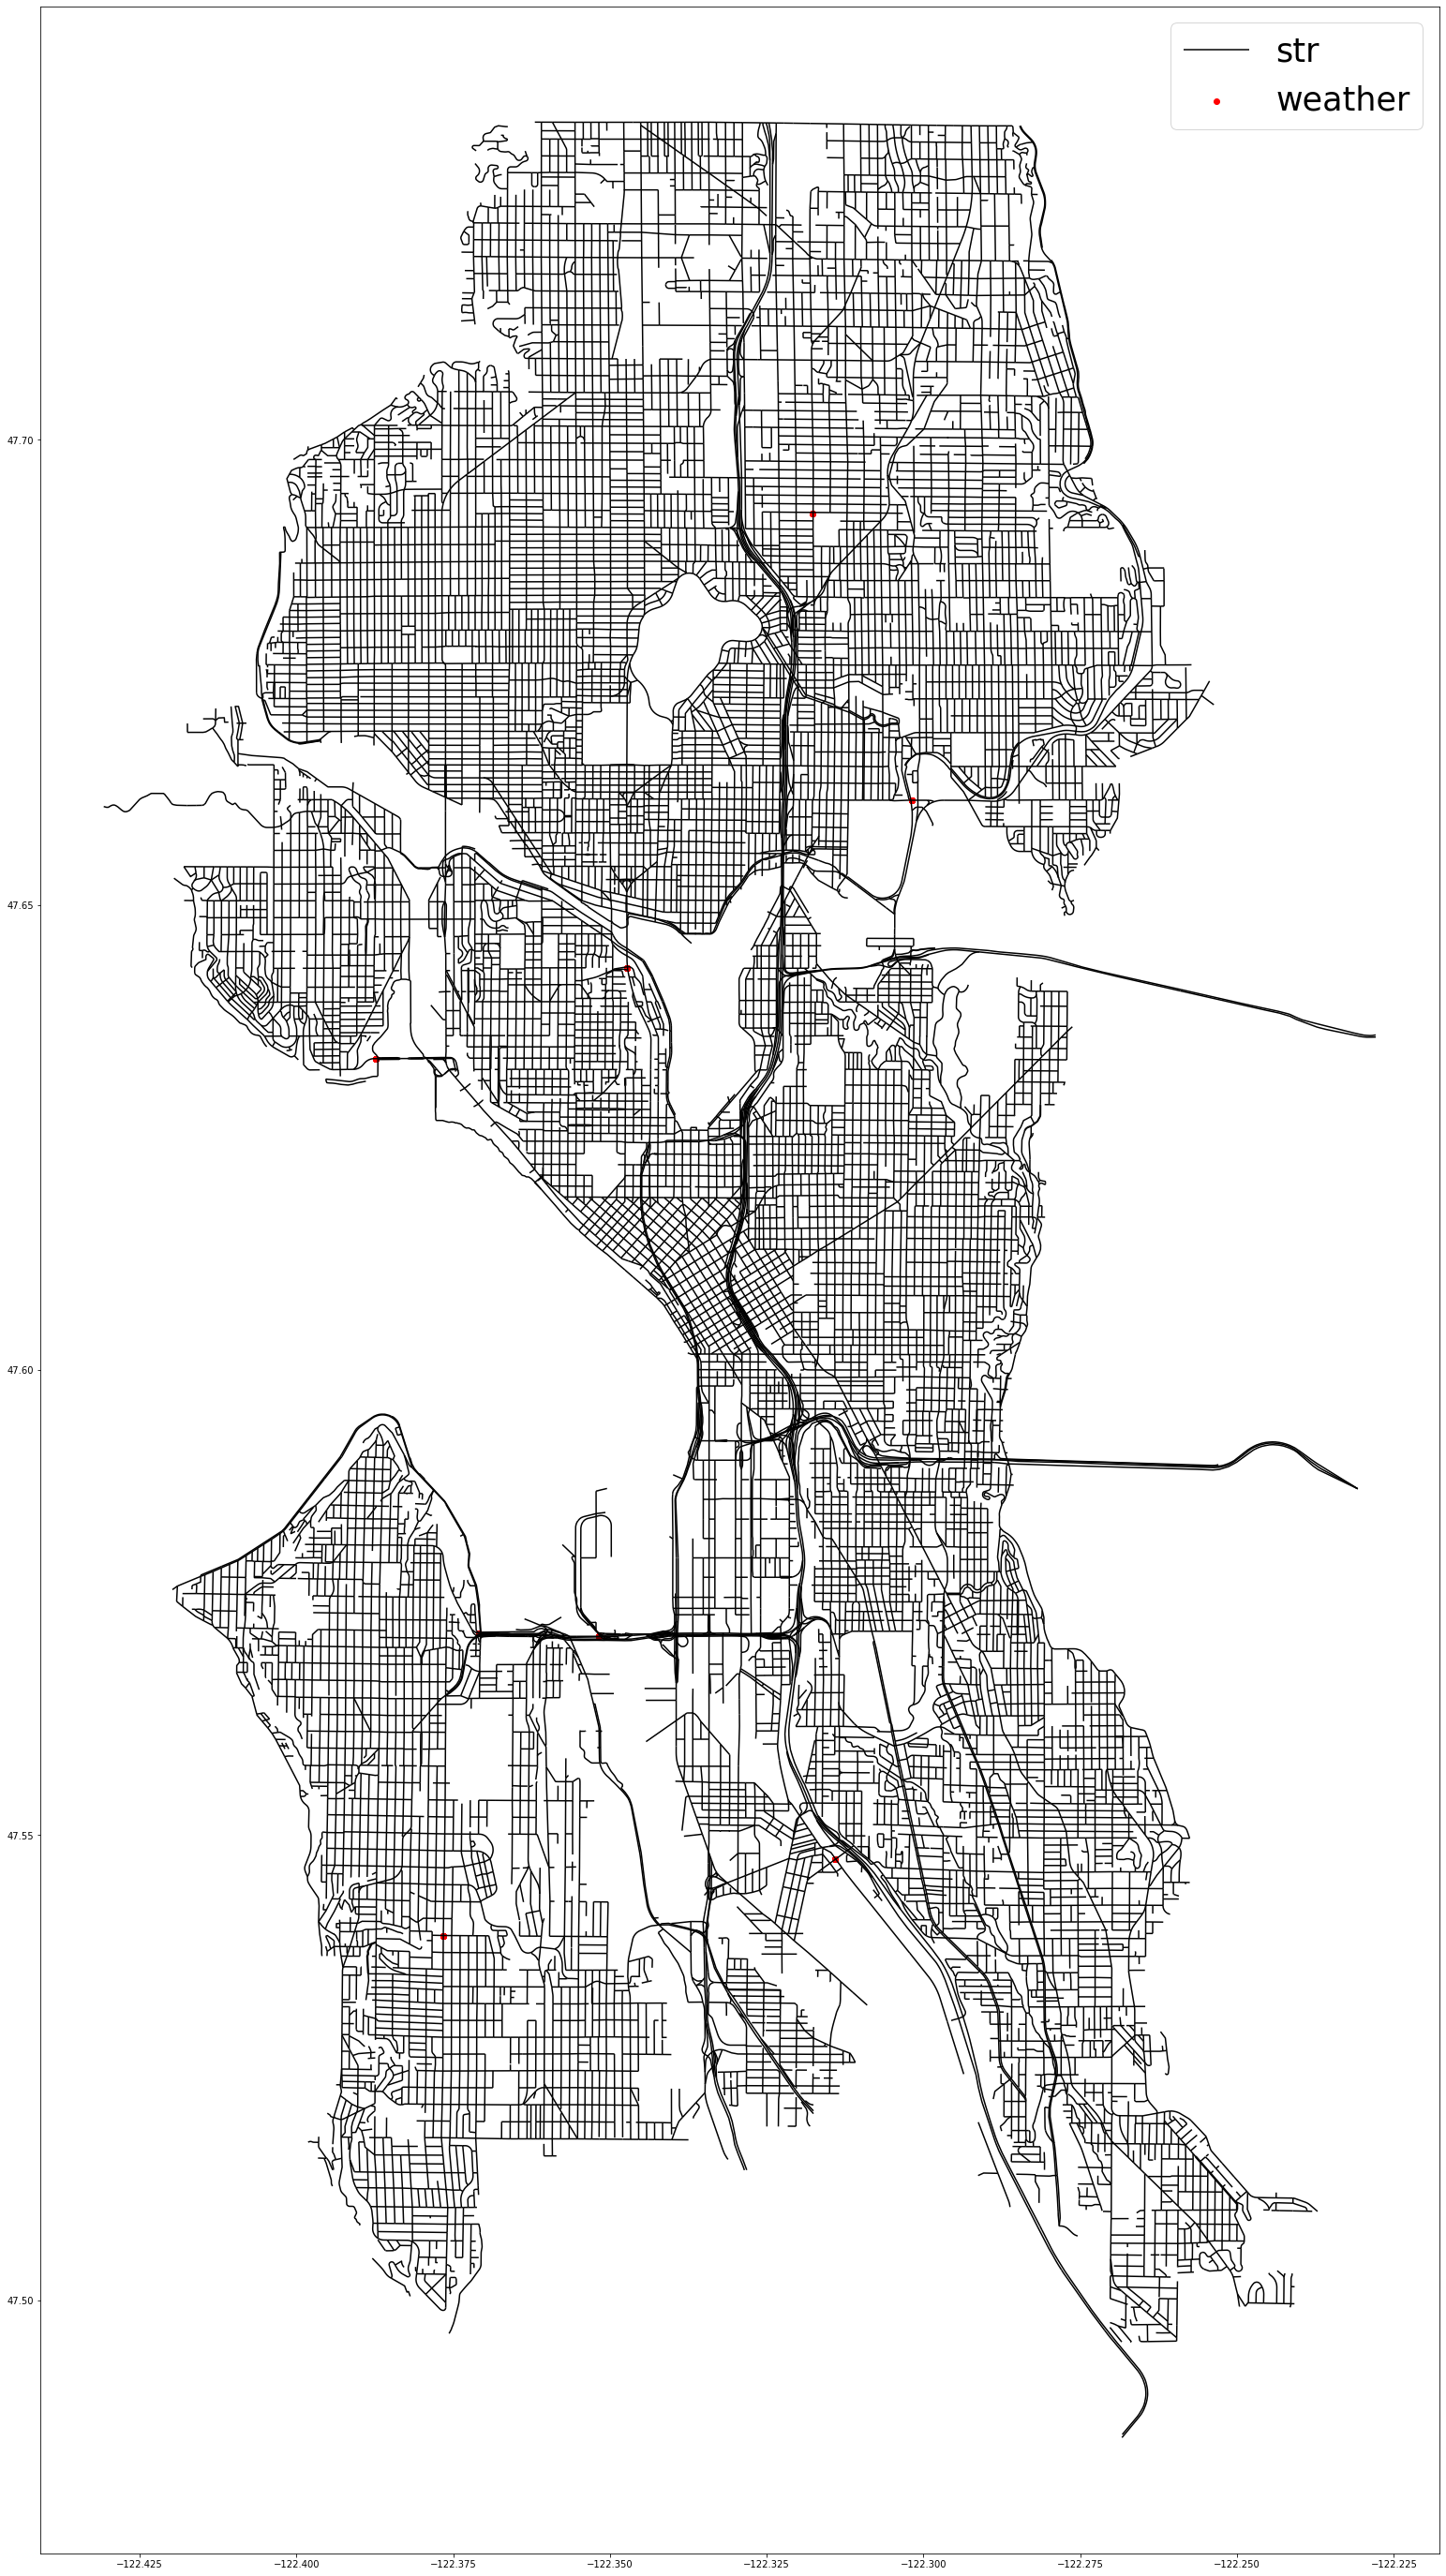

In [26]:
fig, ax = plt.subplots(figsize = (50,50))
str_shp.plot(ax=ax, color="black", label="str")
weather_shp.plot(ax=ax, color="red", label="weather")
plt.legend(prop={'size':35})
plt.show()

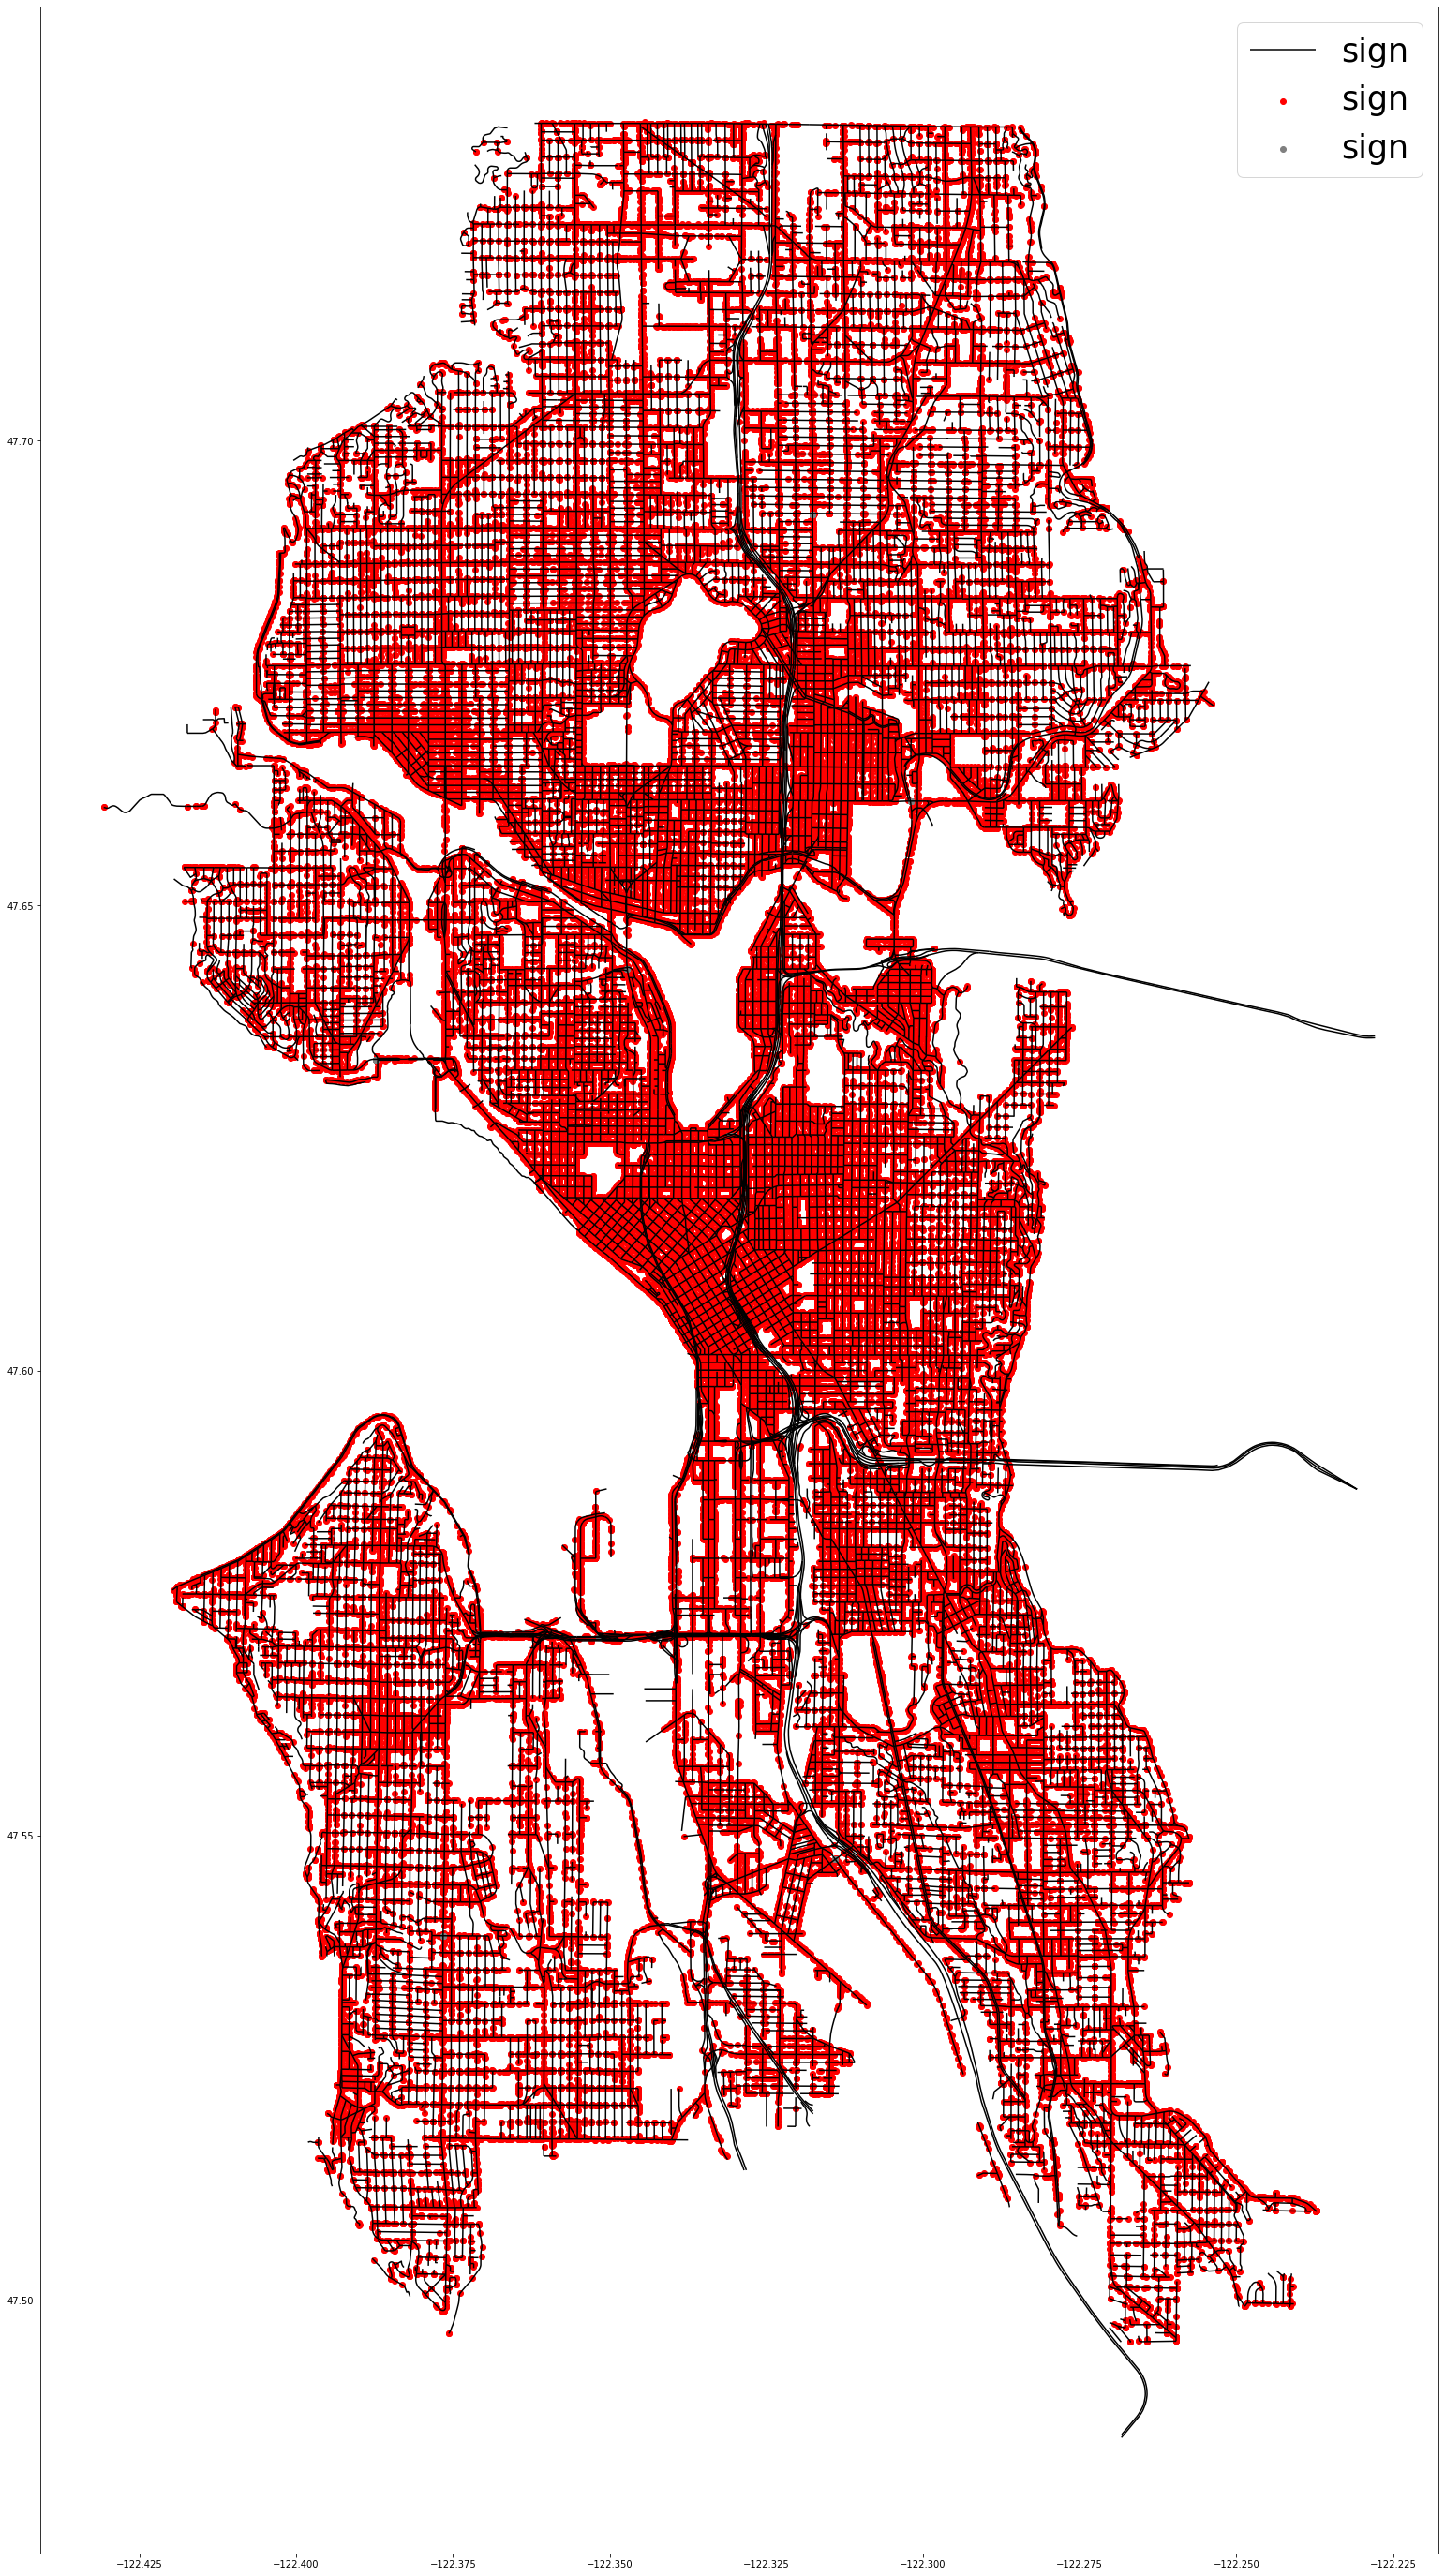

In [20]:
fig, ax = plt.subplots(figsize = (50,50))
str_shp.plot(ax=ax, color="black", label="str")
sign_shp.plot(ax=ax, color="red", label="sign")
weather_shp.plot(ax=ax, color="grey", label="weather")
plt.legend(prop={'size':35})
plt.show()

In [9]:
test.columns

Index(['OBJECTID_left', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS_left',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNC', 'EXCEPTRSND',
       'SEVERITYCO', 'SEVERITYDE', 'COLLISIONT', 'PERSONCOUN', 'PEDCOUNT',
       'PEDCYLCOUN', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJ', 'FATALITIES',
       'INCDATE', 'INCDTTM', 'JUNCTIONTY', 'SDOT_COLCO', 'SDOT_COLDE',
       'INATTENTIO', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTG', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKK', 'HITPARKEDC', 'geometry', 'index_right',
       'OBJECTID_right', 'ARTCLASS', 'COMPKEY', 'UNITID', 'UNITID2',
       'UNITIDSORT', 'UNITDESC', 'STNAME_ORD', 'XSTRLO', 'XSTRHI',
       'ARTDESCRIP', 'OWNER', 'STATUS_right', 'BLOCKNBR', 'SPEEDLIMIT',
       'SEGDIR', 'ONEWAY', 'ONEWAYDIR', 'FLOW', 'SEGLENGTH', 'SURFACEWID',
       'SURFACETYP', 'SURFACET_1', 'INTRLO', 'DIRLO', 'INTKEYLO', 'INTRHI',
       'DIRHI', 'NATIONHWYS', 'STREETTYPE', 'PVMTCONDIN', 

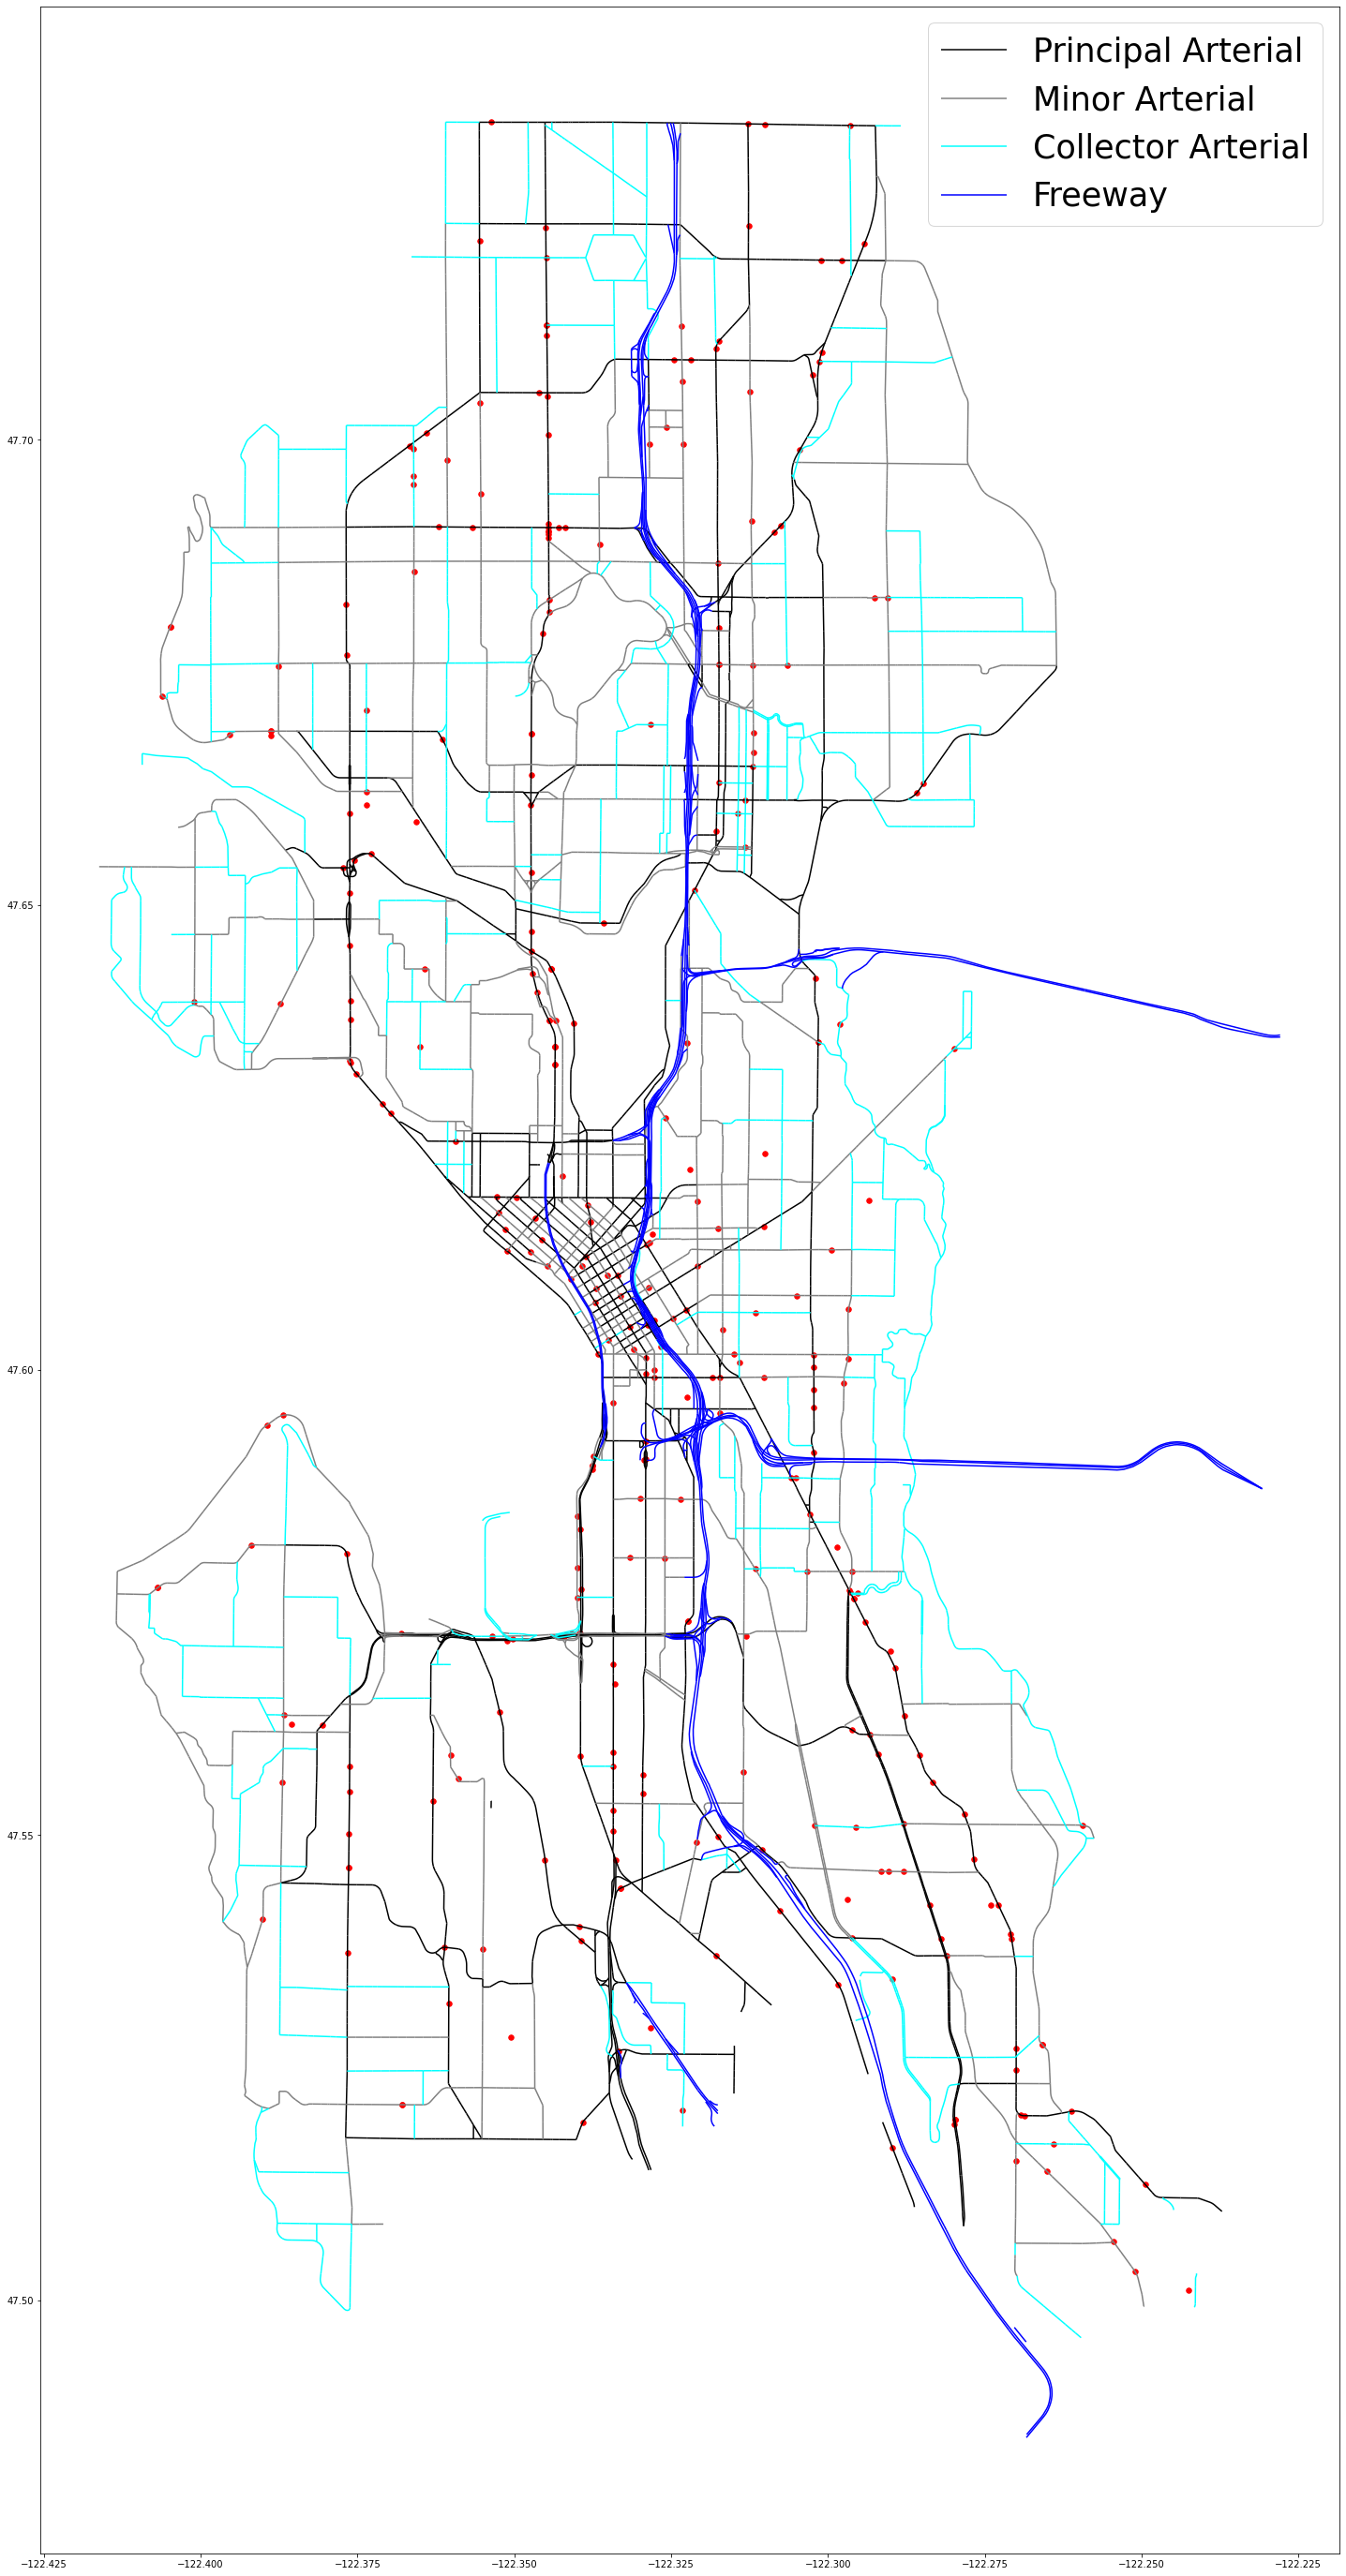

In [49]:
# Graph accidents on the streets: looks like a lot of accidents are on principal arterial
fig, ax = plt.subplots(figsize = (50,50))
str_shp[str_shp['ARTDESCRIP']=='Principal Arterial'].plot(ax=ax, color="black", label="Principal Arterial")
str_shp[str_shp['ARTDESCRIP']=='Minor Arterial'].plot(ax=ax, color="grey", label="Minor Arterial")
str_shp[str_shp['ARTDESCRIP']=='Collector Arterial'].plot(ax=ax, color="cyan", label="Collector Arterial")
str_shp[str_shp['ARTDESCRIP'].isin(['Interstate/Freeway', 'State Route/Freeway'])].plot(ax=ax, color="blue", label="Freeway")
clo_shp[clo_shp['SEVERITYCO']=='3'].plot(ax = ax, markersize = 30, color="red", marker="o")
plt.legend(prop={'size':35})
plt.show()

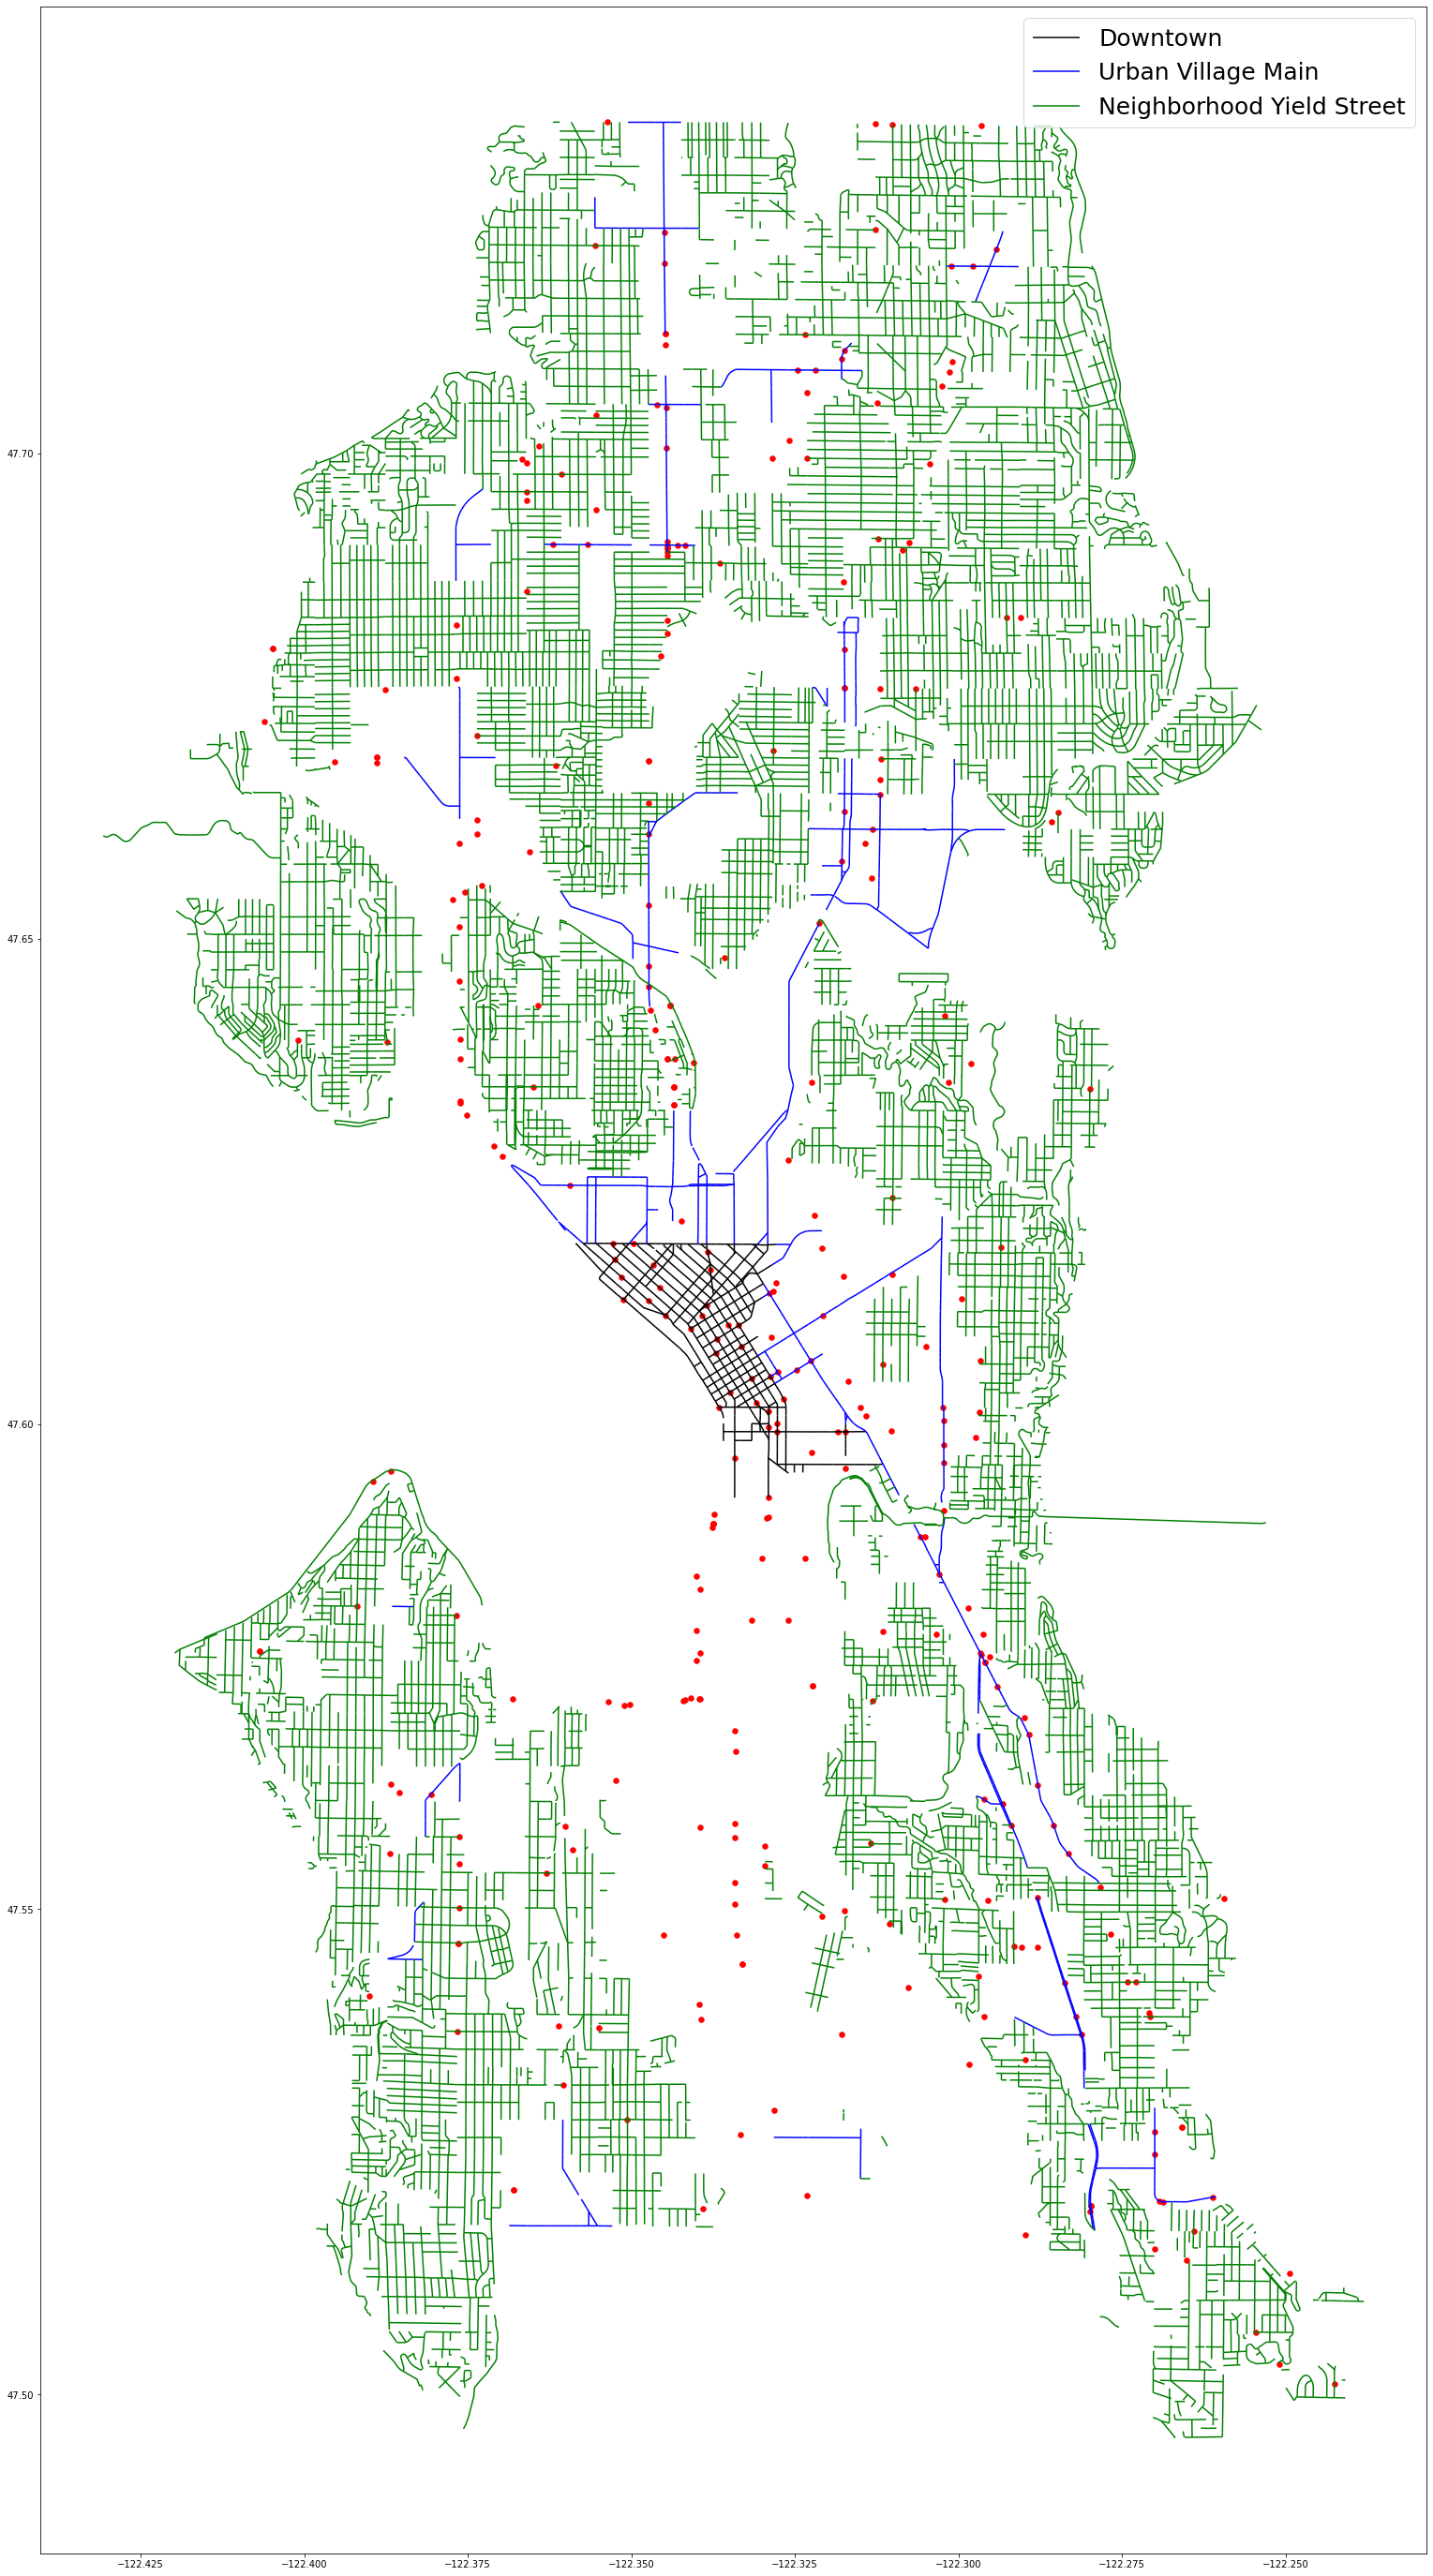

In [54]:
# Seems like accidents are everywhere
fig, ax2 = plt.subplots(figsize = (50,50))
str_shp[str_shp['STREETTYPE'].isin(['Downtown', 'Downtown Neighborhood'])].plot(ax=ax2, color="black", label="Downtown")
str_shp[str_shp['STREETTYPE']=='Urban Village Main'].plot(ax=ax2, color="blue", label="Urban Village Main")
str_shp[str_shp['STREETTYPE']=='Neighborhood Yield Street'].plot(ax=ax2, color="green", label="Neighborhood Yield Street")
clo_shp[clo_shp['SEVERITYCO']=='3'].plot(ax = ax2, markersize = 30, color="red", marker="o")
plt.legend(prop={'size':25})
plt.show()